# GoingDeeper2 : Sentencepiece Tokenizer

## 노드 실습

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)
print(np.__version__)

2.8.0
1.21.5


In [3]:
import os

path_to_file = os.path.join('./drive/MyDrive/sp_tokenizer/data', 'korean-english-park.train.ko')

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


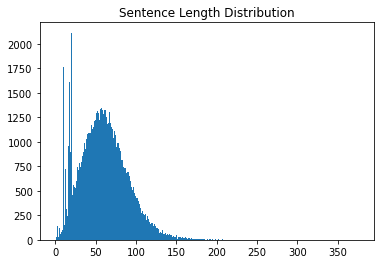

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


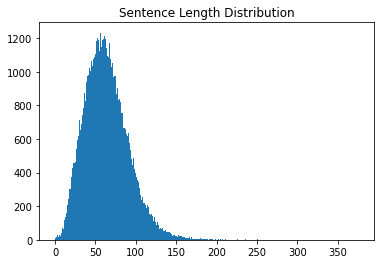

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


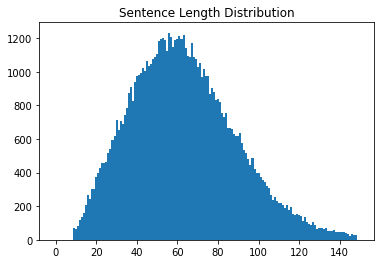

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [10]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [11]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())
    # 코드를 작성하세요

In [12]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [13]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [14]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/grap

In [15]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [16]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141814 sha256=34a379a1650084fac2db30ad387fe16ee01f90548595c26da9e632a02c6b4179
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [17]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요.
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
mecab = Mecab()
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)
    # 코드를 작성하세요

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))
    # 코드를 작성하세요

In [18]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


In [19]:
# Case 1 : tokenizer.sequences_to_texts()
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])
# 여기에 코드를 작성하세요.

우라늄 ( 백색광 을 발하 는 방사성 금속 원소 ;


In [20]:
# Case 2 : tokenizer.index_word
sentence = ""
for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + ""
    
print(sentence)
# 여기에 코드를 작성하세요.

우라늄(백색광을발하는방사성금속원소;


In [21]:
import sentencepiece as spm
import os
temp_file = os.path.join('./drive/MyDrive/sp_tokenizer/data', 'korean-english-park.train.ko.temp')

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 root root 376817 Mar 23 10:38 korean_spm.model
-rw-r--r-- 1 root root 146213 Mar 23 10:38 korean_spm.vocab


## 프로젝트 실습


### 네이버 영화 리뷰 데이터 전처리 및 토큰화(SentencePiece)

In [22]:
!pip install sentencepiece

In [23]:
import numpy as np; np.random.seed(1234)
import pandas as pd

data = pd.read_csv('./drive/MyDrive/sp_tokenizer/data/ratings.txt', sep='\t', quoting=3)

In [24]:
data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [25]:
data = data.drop(columns = 'id')
data = data.drop(columns = 'label')
data

,document
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산..."
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
...,...
199995,포켓 몬스터 짜가 ㅡㅡ;;
199996,쓰.레.기
199997,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.
199998,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ


In [26]:
data.to_csv('naver.txt',mode='w',columns=None, index = False)

In [27]:
with open('naver.txt', 'r') as f:
  naver = f.read().splitlines()

print("Data Size:", len(naver))

print("Example:")
for sen in naver[0:10]: print(">>", sen)

Data Size: 200001
Example:
>> document
>> 어릴때보고 지금다시봐도 재밌어요ㅋㅋ
>> "디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."
>> 폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
>> 와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지
>> 안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
>> 사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화
>> 완전 감동입니다 다시봐도 감동
>> 개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음
>> 굿


문장의 최단 길이: 1
문장의 최장 길이: 158
문장의 평균 길이: 75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


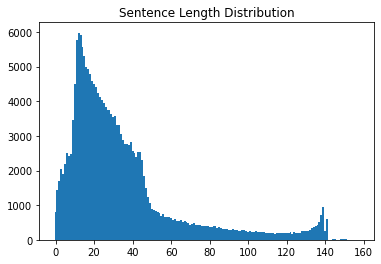

In [28]:
min_len = 999
max_len = 0
sum_len = 0

for sen in naver:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in naver:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [29]:
def check_sentence_with_length(naver, length):
    count = 0
    
    for sen in naver:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(naver, 1)

굿
핡
굿
휴
굿
시
ㅋ
ㅇ
굿
‥
O
굿
굿
굿
갑
ㅎ
굿
.
올
굿
헷
g
굿
♥
.
짱
짱
ㅆ
.
굿
짱
굿
.
굿
굿
굿
.
굿
짱
굳
굿
잼
굿
짱
굿
굿
ㅎ
굿
굿
굿
ㅁ
굳
굿
굿
?
ㅎ
굿
굿
.
짱
ㅇ
ㅋ
애
굿
ㅋ
굿
?
짱
.
흠
굿
ㅋ
!
굿
찜
b
굿
굳
짱
짱
짱
짱
굿
굿
짱
굿
♥
굳
.
굿
굳
ㅎ
굿
굿
.
굿
굳
굿
굿
굿
굿


In [30]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 5500:
        print("Outlier Index:", idx+1)

Outlier Index: 12
Outlier Index: 13
Outlier Index: 14
Outlier Index: 15


In [31]:
check_sentence_with_length(naver, 12)

고질라니무 귀엽다능ㅋㅋ
3도 반전 좋았제 ^^
재밌습니다.재밌습니다.
와~ 정말 재밌네요!!
재밌을 것 같은데...
9점대는 만들어야지..
도리 너무 좋다 ㅋㅋㅋ
확실한건 MB는 쓰레기
아따맘마의 오리지널 ㅋ
공포영화매니아의 지침서
반전이 짱입니다 !!!
어떻게 안 울 수 있냠
완전 짱좋은드라마^♥^
이번껀 솔직히 괜찮았다
보고 정말 재밌다...
많이.. .. 안타깝다
언제봐도 행복한영화..
간만감동~~ 별 다섯개
재미있었다! 또봐야징ㅎ
너무너무너무너무너무좋다
니키에게 모든 영광을.
10자이상을 남기십시오
레아세이두 최고최고최고
잔잔하고 꾸밈없는 영화
줄거리가 스포...??
러셀 연기가 존멋이네요
조커의 연기가 눈부시다
이제봤다는게 아쉬울뿐.
진짜 존장 재밌다 진짜
전형적인 한국형 스릴러
진짜재밌다 ㅋㅋㅋㅋㅋㅋ
재미잇는 영화였내요^^
생각할수록 무서워진다.
근육질 아버지라 ^^;
장난감 세계의 감미로움
좋다 좋다ㅋㅋ현우좋다♥
♥예수님사랑해요오오오오
제대로 알아야할 역사임
대박.ㄷㄷㄷㄷㄷㄷㄷㄷㄷ
재밌구만 왜OO들이야;
제중원 너무 좋다~!!
비주얼만 놓고보면...
생각보다 재밌음 ㅋㅋㅋ
재미따재미따재미따재미따
야마카시의 원조 성룡~
너무 잼있게 봤다 ^^
재밋러욬ㅋㅋㅋㅋㅋㅋㅋㅋ
말이 필요없는 영화!!
^-^ 감동적이에요 ㅋ
ㅋㅋㅋㅋㅋ찰리의 사이렌
오~ 나가사와 마사미!
말이필요없는 드라마인듯
나름 볼만했음~ 굿~~
눈을 보고 대화해요오오
가볍게보기좋은영화ㅎㅋㅋ
그냥 심심할떄 보는영화
꿀잼있다 엄청나게 잼꿀
누구보단 잘할것 같다.
정말 좋은 영화입니다.
다시봐도 재밌었던 영화
역대 축구영화중 최고임
어떤 말로 표현하리..
신선한 좀비 스토리다.
내용전개가 좋아요 ^^
매트릭스2 씹바른 영화
솔직히 감동 (10자)
애들이 좋아하네요~^^
풋풋하고 따뜻한 영화.
1빠다 ㅋㅋ 10점드림
설경구 최고의 영화이다
구로사와 영화는 교과서
굉장히 재밌게 봤습니다
액션도 좋고 재미도있고
기대이상기대이상기대이상
오빠들사랑해요 진심으로
이영화 미친거아니야?!
브레이브하트와 견줄만한

Data Size: 194545
문장의 최단 길이: 1
문장의 최장 길이: 158
문장의 평균 길이: 36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


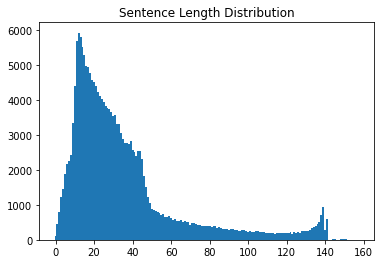

In [32]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(naver))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [33]:
check_sentence_with_length(naver, 5)

단연 최고
재미있어요
엔트랩먼트
감동 ㅜㅠ
좋은데요.
적당 ㅎㅎ
좋아요ㅎㅎ
굿~~!!
택시 기사
큭 웃긴다
또보고싶다
결말 ㅠㅠ
GOOD~
재밋네요~
재밋다~~
난 좋았다
재미있네요
대작이네요
감동??ㅋ
준기니깐♥
슬프다..
둘다 이쁨
훈훈하군~
그냥 ..
보고잡다.
잼나네 ㅎ
할리베리짱
진짜재밌덩
재미있어요
지상렬깜찍
제미있는데
일단 봐라
외로울 때
재미있어요
재미있어어
..이연희
괜찮다..
좋다 좋아
그냥 최고
최고!!!
재밋겟네요
대박이네요
재밋어욬ㅋ
오왕 굳.
조니뎁 ♡
짝짝짝짝짝
최고지ㅋㅋ
최고 !!
와..진짜
재밌는데?
아련돋네.
꽤좋았어요
좋은듯..
재밋어요~
진짜 웃김
Good!
그냥최고다
재밌겠다능
감동...
완벽하다!
베드신 굳
카밀라벨♥
재밌어요~
따뜻하다.
굳굳굳!!
꼭 봐라.
난좋은데?
훈훈해 ㅋ
건카타 짱
감동적이다
잼있다~~
명품 사극
이효리 짱
재미있었다
재미 만땅
볼만했어요
잘봣습니다
추리스릴러
최고다..
잼나요~♡
따뜻한영화
좋습니다.
내이름은얼
재밌어요!
완전잼나!
좋습니다.
연기 끝장
닥터짱짱맨
역시 픽사
너무재밌다
재밋음ㅋㅋ
소잰 최고
그냥 최고
아주 좋다
좋아좋아~
ㄱㄱ헏ㄱ짛
좋네요..
잼잇다..
ㅎㅎ재밌음
감동이다ㅠ
훈훈하다ㅎ


**너무 긴 데이터들을 본 결과 고유명사 등 형성에 오히려 어려움을 줄 법한 내용이 많아 사용하지 않기로 했다.**

Data Size: 161007


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


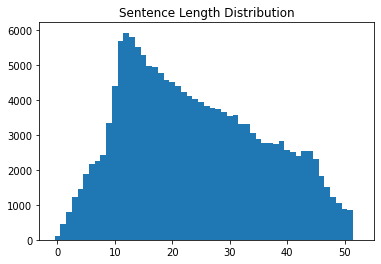

In [34]:
max_len = 53
min_len = 1

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]
print("Data Size:", len(filtered_corpus))

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [35]:
import sentencepiece as spm
import os
temp_file = os.path.join('./drive/MyDrive/sp_tokenizer/data', 'naver.train.ko.temp')

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=naver_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l naver_spm*

-rw-r--r-- 1 root root 374565 Mar 23 10:39 naver_spm.model
-rw-r--r-- 1 root root 144040 Mar 23 10:39 naver_spm.vocab


In [45]:
def sp_tokenize(s, corpus, max_len_):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./naver_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, maxlen=max_len_, padding='post')

    return tensor, word_index, index_word

In [37]:
# 모델 불러오기
s = spm.SentencePieceProcessor()
s.Load('./naver_spm.model')

True

In [38]:
# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('그지같은거열이너무받네.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('그지같은거열이너무받네.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[4985, 17, 64, 901, 7, 217, 1416, 42, 4]
['▁그지같', '은', '거', '열', '이', '너무', '받', '네', '.']
그지같은거열이너무받네.


### 네이버 감정 분류모델 재학습

**train, test data preprocessing**

In [39]:
import numpy as np
import pandas as pd
import re
import json

DATA_PATH = './drive/MyDrive/naver/'
train_data = pd.read_csv(DATA_PATH+'ratings_train.txt', header = 0, delimiter='\t', quoting=3)
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)

train_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
# train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글과 공백을 제외하고 모두 제거
# train_data['document'] = train_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
# train_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거

print('Data size : ', len(train_data))
train_data[:5]

Data size :  146182


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [40]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
# test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
# test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
# test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거

print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
test_data[:5]

전처리 후 테스트용 샘플의 개수 : 49157


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [41]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


Data Size: 122353


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


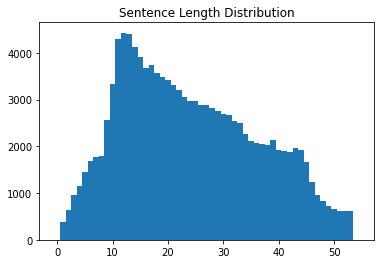

In [42]:
# train_corpus = []
# for data in train_data['document']:
#   train_corpus.append(data)
  
# train_corpus[:5]

max_len = 55
min_len = 2

# 길이 조건에 맞는 문장만 선택합니다.
train_filtered = [s for s in train_data['document'] if (len(s) < max_len) & (len(s) >= min_len)]
print("Data Size:", len(train_filtered))

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in train_filtered:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [43]:
# test_corpus = []
# for data in test_data['document']:
#   test_corpus.append(data)

# test_corpus[:5]

train_data = train_data[(train_data['document'].map(len) <= max_len)*(train_data['document'].map(len) >= min_len)]

train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


**tokenizing**
<br>
<br>
naver_spm

In [46]:
ns = spm.SentencePieceProcessor()
ns.Load('naver_spm.model')

x_train = []
train_word_index = {}
train_index_word = {}

x_train, train_word_index, train_index_word = sp_tokenize(ns, train_data['document'], max_len)

In [47]:
x_test = []
test_word_index = {}
test_index_word = {}

x_test, test_word_index, test_index_word = sp_tokenize(ns, test_data['document'], max_len)

In [48]:
x_train.shape

(122952, 55)

In [49]:
x_test.shape

(49157, 55)

In [50]:
x_valid = x_train[:40000]   
y_valid = train_data['label'][:40000]

x_train = x_train[40000:]   
y_train = train_data['label'][40000:]

y_test = test_data['label']

In [51]:
print(len(x_train), len(y_train))

82952 82952


In [52]:
print(len(x_valid), len(y_valid))

40000 40000


### 모델 빌드

In [53]:
vocab_size

8000

In [54]:
word_vector_dim = 200

In [55]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(128))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 64로 하였습니다. (변경가능)
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         1600000   
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,768,577
Trainable params: 1,768,577
Non-trainable params: 0
_________________________________________________________________


In [60]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [61]:
mc = ModelCheckpoint('./drive/MyDrive/naver/model/mecab_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [62]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=60, # 512, 100, 60 
                    validation_data=(x_valid, y_valid),
                    verbose=1,
                    callbacks = [es, mc])

Epoch 1/20
1383/1383 [==============================] - ETA: 0s - loss: 0.5139 - accuracy: 0.7467
Epoch 1: val_accuracy improved from -inf to 0.83475, saving model to ./drive/MyDrive/naver/model/mecab_best_model.h5
1383/1383 [==============================] - 14s 9ms/step - loss: 0.5139 - accuracy: 0.7467 - val_loss: 0.3776 - val_accuracy: 0.8347
Epoch 2/20
1377/1383 [============================>.] - ETA: 0s - loss: 0.3257 - accuracy: 0.8612
Epoch 2: val_accuracy improved from 0.83475 to 0.84737, saving model to ./drive/MyDrive/naver/model/mecab_best_model.h5
1383/1383 [==============================] - 12s 9ms/step - loss: 0.3256 - accuracy: 0.8613 - val_loss: 0.3474 - val_accuracy: 0.8474
Epoch 3/20
1380/1383 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.8879
Epoch 3: val_accuracy improved from 0.84737 to 0.84875, saving model to ./drive/MyDrive/naver/model/mecab_best_model.h5
1383/1383 [==============================] - 12s 9ms/step - loss: 0.2700 - accura

In [64]:
# 모델 평가
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

1537/1537 - 4s - loss: 0.4800 - accuracy: 0.8314 - 4s/epoch - 3ms/step
[0.4800386130809784, 0.8313973546028137]


### naver corpus로 만든 토크나이저로는 죽어도 안될 것 같다. korean_spm을 써보자

In [65]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

True

In [66]:
x_train2 = []
train2_word_index = {}
train2_index_word = {}

x_train2, train2_word_index, train2_index_word = sp_tokenize(s, train_data['document'], max_len)

In [67]:
x_test2 = []
test2_word_index = {}
test2_index_word = {}

x_test2, test2_word_index, test2_index_word = sp_tokenize(s, test_data['document'], max_len)

In [68]:
x_valid2 = x_train2[:40000]   
y_valid2 = train_data['label'][:40000]

x_train2 = x_train2[40000:]   
y_train2 = train_data['label'][40000:]

y_test2 = test_data['label']

In [69]:
word_vector_dim2 = 200

In [70]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(vocab_size, word_vector_dim2, input_shape=(None,)))
model2.add(keras.layers.LSTM(128))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 64로 하였습니다. (변경가능)
model2.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         1600000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               168448    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,768,577
Trainable params: 1,768,577
Non-trainable params: 0
_________________________________________________________________


In [71]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [72]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model2.fit(x_train2,
                    y_train2,
                    epochs=epochs,
                    batch_size=60, # 512, 100, 60 
                    validation_data=(x_valid2, y_valid2),
                    verbose=1,
                    callbacks = [es, mc])

Epoch 1/20
1378/1383 [============================>.] - ETA: 0s - loss: 0.5122 - accuracy: 0.7430
Epoch 1: val_accuracy did not improve from 0.84875
1383/1383 [==============================] - 13s 8ms/step - loss: 0.5119 - accuracy: 0.7433 - val_loss: 0.4287 - val_accuracy: 0.8109
Epoch 2/20
1380/1383 [============================>.] - ETA: 0s - loss: 0.3802 - accuracy: 0.8329
Epoch 2: val_accuracy did not improve from 0.84875
1383/1383 [==============================] - 11s 8ms/step - loss: 0.3803 - accuracy: 0.8330 - val_loss: 0.3895 - val_accuracy: 0.8280
Epoch 3/20
1380/1383 [============================>.] - ETA: 0s - loss: 0.3374 - accuracy: 0.8544
Epoch 3: val_accuracy did not improve from 0.84875
1383/1383 [==============================] - 11s 8ms/step - loss: 0.3373 - accuracy: 0.8544 - val_loss: 0.3940 - val_accuracy: 0.8334
Epoch 4/20
1379/1383 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.8709
Epoch 4: val_accuracy did not improve from 0.84875
13

In [74]:
# 모델 평가
results = model2.evaluate(x_test2, y_test2, verbose=2)
print(results)

1537/1537 - 4s - loss: 0.4014 - accuracy: 0.8306 - 4s/epoch - 3ms/step
[0.40136876702308655, 0.8305633068084717]


# 회고



## 문제를 모르겠음
타 형태소 분석기와의 비교는 시도조차 못해봤다. 학습 과정에서 무엇이 문제인지 학습이 전혀 이루어지지 않아서 시도해본 전처리 방식만 몇 가지가 되는 것 같다. 공백과 여타 문자를 모두 제거하고 한글만 남기기도 하고, 전처리를 아예 수행하지 않기도 하고, 토크나이저 생성에서 무언가 잘못되었나 싶어 생성된 단어장 파일 등등을 모두 뜯어보고 코드를 여러 방면으로 뜯어보았지만 결국 해결하지 못했다. 심지어 노드에서 주어진 한국어 병렬 데이터로도 학습이 제대로 이루어지지 않는다. 이 사실이 시사하는 바는 아마 내가 전처리나 학습데이터 토크나이징, 분할 단계에서 심하게 잘못한 것 같은데.. 아직 코드가 워낙 미숙하다보니 직접 작성한(사실 대부분 어디선가 긁어온) 코드에 대해서는 해석이 쉽지 않다. 에러가 출력되는 것이라면 몰라도... 기존에는 노드 내용과 대조하면 거의 모든 문제가 해결되었는데 그것이 얼마나 쉬운 방식의 공부였는지 깨달았다.
<br><br>
?? 회고를 쓰면서 마지막으로 코드를 돌렸는데 왜 해결된건지는 모르겠지만 accuracy가 올라가긴 한다. 심지어 기준을 넘어 0.83까지 찍혔다. 매우 보람차군. 강산퍼실님 뭐가 문제였던 건지 알려주실 수 있을까요?(NLP는 어차피 강산퍼실님이 다 보신다기에)
<br><br>
성공적으로 학습을 마치고 회고를 적으면서 불현듯 든 생각은 colab 자체적인 문제 때문이였지 않았을까 싶다. colab에서 수정한 코드 내용이 메모리에 갱신되는 것에 약간의 텀이 있는 듯 한데 너무 자주 많은 부분을 수정하다보니 한번에 적용되지 않은 상태에서 코드가 컴파일되어 학습이 제대로 이루어지지 않았을 수도 있었을 것이라는 생각이 든다. 리얼타임으로 수행되었어야 내가 어디서 틀렸고 어디를 고침으로써 해결된 것인지 정확하게 캐치할 수 있었을 텐데 그걸 알아가지 못하는 것이 많이 아쉽다.

## 그래도 나아지긴 한건가
이번 노드를 진행하면서 그냥 자위할 수 있는 부분은 그나마 모든 에러를 해결하고 스스로 처음부터 끝까지 코드를 작성할 수 있게 되었다는 사실이다. 사실 중요한 부분은 거의 노드에서 알려주고 있긴 하지만 어쨋든 나의 서칭능력이나 코드 작성능력이 조금은 나아진게 아닐까?

## REF
* naver text-classifier<br>
https://wonhwa.tistory.com/35<br>
https://wikidocs.net/44249<br>
https://vg-rlo.tistory.com/74<br>
https://wikidocs.net/33274<br>
<br><br>
* spm tokenizer usage<br>
https://paul-hyun.github.io/vocab-with-sentencepiece/<br>